C:\Users\jesus\AppData\Local\Temp\ipykernel_16548\4167673843.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gendr", data=df, order=df["gendr"].value_counts().index, palette="pastel")


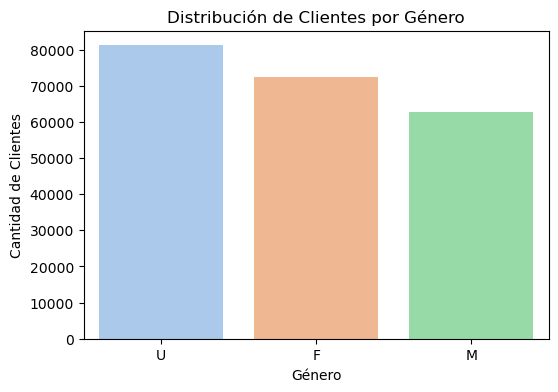

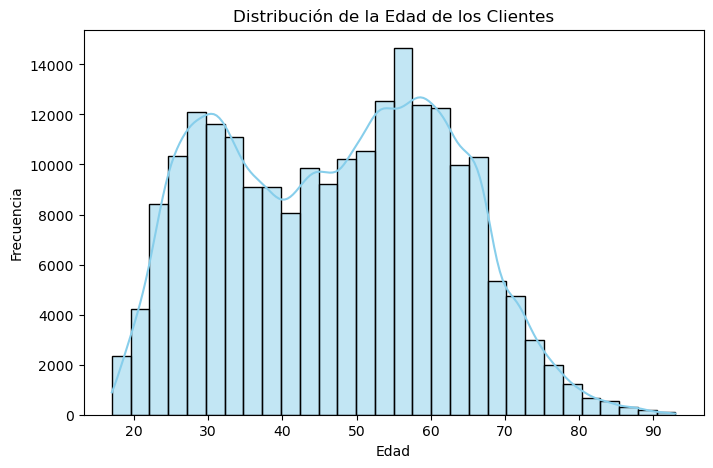

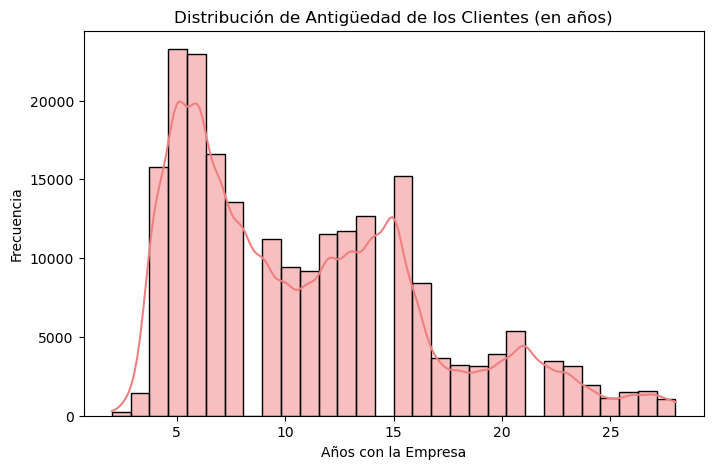

C:\Users\jesus\AppData\Local\Temp\ipykernel_16548\4167673843.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num_accts", data=df, palette="muted", order=df["num_accts"].value_counts().index)


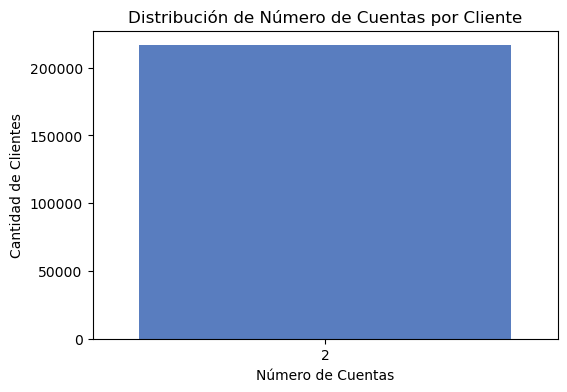

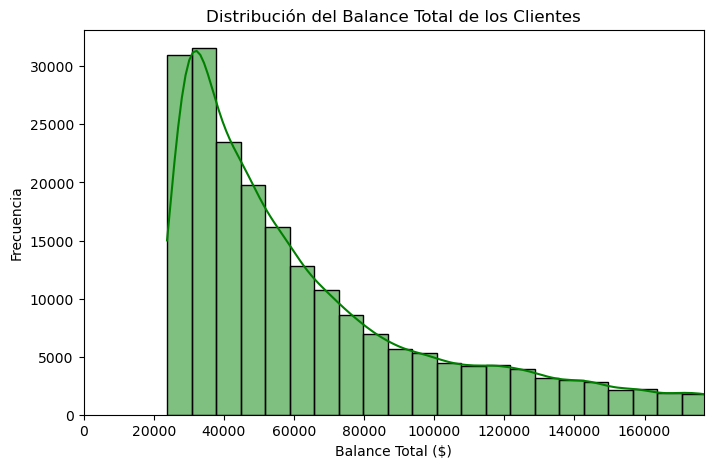


=== Resumen Estadístico de los Clientes ===
            clnt_age  clnt_tenure_yr  num_accts            bal
count  216498.000000   216498.000000   216498.0  216498.000000
mean       47.138593       11.003594        2.0   70130.813002
std        15.431041        5.762237        0.0   47010.853868
min        17.000000        2.000000        2.0   23789.440000
25%        33.500000        6.000000        2.0   35580.725000
50%        48.000000       10.000000        2.0   52770.990000
75%        59.500000       15.000000        2.0   88274.600000
max        93.000000       28.000000        2.0  233632.590000

Mediana de edad de los clientes: 48.0 años
Conclusión: La mayoría de los clientes son mayores (>=40 años).

Mediana de antigüedad de los clientes: 10.0 años
Conclusión: La mayoría de los clientes son antiguos (>=5 años con la empresa).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# PASO 1: Cargar el DataFrame procesado
# --------------------------------------------------
df = pd.read_csv("../../data/processed/navegacion_clientes_experimento_limpio.csv")

# --------------------------------------------------
# PASO 2: Limpiar y revisar los datos demográficos
# --------------------------------------------------
# Convertir columnas relevantes a numéricas
df["clnt_age"] = pd.to_numeric(df["clnt_age"], errors="coerce")
df["clnt_tenure_yr"] = pd.to_numeric(df["clnt_tenure_yr"], errors="coerce")
df["num_accts"] = pd.to_numeric(df["num_accts"], errors="coerce")
df["bal"] = pd.to_numeric(df["bal"], errors="coerce")

# --------------------------------------------------
# PASO 3: Análisis de Distribuciones
# --------------------------------------------------

# 1) Distribución por Género
plt.figure(figsize=(6, 4))
sns.countplot(x="gendr", data=df, order=df["gendr"].value_counts().index, palette="pastel")
plt.title("Distribución de Clientes por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.show()

# 2) Distribución por Edad
plt.figure(figsize=(8, 5))
sns.histplot(df["clnt_age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 3) Distribución por Antigüedad
plt.figure(figsize=(8, 5))
sns.histplot(df["clnt_tenure_yr"].dropna(), bins=30, kde=True, color="lightcoral")
plt.title("Distribución de Antigüedad de los Clientes (en años)")
plt.xlabel("Años con la Empresa")
plt.ylabel("Frecuencia")
plt.show()

# 4) Distribución por Número de Cuentas
plt.figure(figsize=(6, 4))
sns.countplot(x="num_accts", data=df, palette="muted", order=df["num_accts"].value_counts().index)
plt.title("Distribución de Número de Cuentas por Cliente")
plt.xlabel("Número de Cuentas")
plt.ylabel("Cantidad de Clientes")
plt.show()

# 5) Distribución del Balance Total
plt.figure(figsize=(8, 5))
sns.histplot(df["bal"].dropna(), bins=30, kde=True, color="green")
plt.title("Distribución del Balance Total de los Clientes")
plt.xlabel("Balance Total ($)")
plt.ylabel("Frecuencia")
plt.xlim(0, df["bal"].quantile(0.95))  # Filtramos valores extremos en el gráfico
plt.show()

# --------------------------------------------------
# PASO 4: Resumen de los perfiles demográficos
# --------------------------------------------------
print("\n=== Resumen Estadístico de los Clientes ===")
print(df[["clnt_age", "clnt_tenure_yr", "num_accts", "bal"]].describe())

# --------------------------------------------------
# PASO 5: Identificar los grupos principales
# --------------------------------------------------

# ¿Los clientes principales son jóvenes o mayores?
edad_mediana = df["clnt_age"].median()
print(f"\nMediana de edad de los clientes: {edad_mediana:.1f} años")
if edad_mediana < 40:
    print("Conclusión: La mayoría de los clientes son jóvenes (<40 años).")
else:
    print("Conclusión: La mayoría de los clientes son mayores (>=40 años).")

# ¿Los clientes principales son nuevos o antiguos?
tenure_mediana = df["clnt_tenure_yr"].median()
print(f"\nMediana de antigüedad de los clientes: {tenure_mediana:.1f} años")
if tenure_mediana < 5:
    print("Conclusión: La mayoría de los clientes son nuevos (<5 años con la empresa).")
else:
    print("Conclusión: La mayoría de los clientes son antiguos (>=5 años con la empresa).")
